Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [1]:
%matplotlib inline
import random

import numpy as np
import scipy as sc
import scipy.stats as st

import seaborn
import matplotlib.pyplot as plt

# Variable aleatoria

Una variable aleatoria es una función que depende de un suceso aleatorio.

$$
X:\Omega\rightarrow \mathbb{R}
$$

donde hay una medida de probabilidad $P$ sobre el *espacio muestral* $\Omega$.

## Simular la distribución de una variable aleatoria

Si podemos hacer extracciones aleatorias de $\Omega$ según la distribución $P$ y conocemos la definición de la variable aleatoria $X$, podemos simular la distribución de la variable aleatoria.

> Si `w1,...,wN` es una muestra aleatoria del espacio de probabilidad $\Omega$, entonces `X(w1),...,X(wN)` es una muestra aleatoria de la variable  $X$.


### Ejemplo: lanzamos dos dados

Podemos representar el lanzamiento de dos dados con el siguiente modelo:

 - $\Omega$ son las tuplas $(a,b)$ donde $a$ y $b$ son dos números del 1 al 6.
 - $P$ es una medida de probabilidad que asigna a cada tupla $w=(a,b)$ la misma probabilidad: $ \left(\frac{1}{6}\right)^2 = \frac{1}{36}$.

Podemos definir varias variables aleatorias asociadas a este espacio de probabilidad:

 - X = "suma de los dos números"
 - Y = "1 si los dos números son iguales, 0 si son distintos"
 - Z = "suma de los dos cuadrados de los dos números"

In [2]:
def experimento():
    'Devuelve el resultado (aleatorio) de lanzar dos dados'
    return [random.randint(1,6), random.randint(1,6)]

def X(w):
    a,b = w
    return a+b

def Y(w):
    a,b = w
    return a==b
    
def Z(w):
    a,b = w
    return a**2 + b**2

In [3]:
#Podemos extraer un punto del espacio muestral, y
#evaluar las tres variables aleatorias
w0 = experimento()
w0, X(w0), Y(w0), Z(w0)

([2, 5], 7, False, 29)

In [4]:
#También podemos hacer una extracción y evaluar X inmediatamente
#pero así, el resultado de llamar a w() se pierde sin remedio
random.seed(2)
X(experimento())

2

In [5]:
#De esta forma, conservamos w0 para lo que sea
random.seed(2)
w0 = experimento()
X(w0)

2

In [6]:
#Si no usamos el mismo w0, las extracciones de X, Y, Z
#son independientes
#Ejercicio: ¿podrían estos tres valores provenir del mismo w?
random.seed(2)
w0 = experimento()
X(w0), Y(w0), Z(w0)

(2, True, 2)

In [7]:
#Si no usamos el mismo w0, las extracciones de X, Y, Z
#son independientes
#Ejercicio: ¿podrían estos tres valores provenir del mismo w?
random.seed(2)
X(experimento()), Y(experimento()), Z(experimento())

(2, False, 40)

Tomando una muestra aleatoria, podemos aproximar probabilidades asociadas a estas variables aleatorias.
Nos preguntamos por la probabilidad de que Z < 2X, por ejemplo...

In [8]:
N = 1000
muestra = [experimento() for _ in range(N)]

def Zmenorque2X(w0):
    return Z(w0) < 2*X(w0)

prob = sum(1 for w0 in muestra if Zmenorque2X(w0))/N
print('P(Z < 2X) ~ ', prob)

P(Z < 2X) ~  0.082


In [9]:
N = 1000
muestra = [experimento() for _ in range(N)]
prob = sum(1 for w0 in muestra if Z(w0) < 2*X(w0))/N
print('P(Z < 2X) ~ ', prob)

P(Z < 2X) ~  0.079


In [10]:
#Aumentamos el tamaño de la simulación y multiplicamos por 36
random.seed(1)
N = 100000
muestra = [experimento() for _ in range(N)]
prob = sum(1 for w0 in muestra if Z(w0) < 2*X(w0))/N
print('36 * P(Z < 2X) ~ ', 36*prob)

36 * P(Z < 2X) ~  3.00744


En un caso sencillo como éste podemos aplicar la fórmula de Cardano y calcular la probabilidad exacta.

In [11]:
# En este caso es más económico recorrer las 36 posibles tuplas
# con lanzamientos de dos dados, y usar que son todas equiprobables

# Contamos 3 casos favorables de un total de 36 casos posibles
# a es el resultado de lanzar el primer dado
for a in range(1,7):
    # b es el resultado de lanzar el segundo dado
    for b in range(1,7):
        # Si Z < 2*X...
        if a**2+b**2<2*(a+b):
            print(a,b)

1 1
1 2
2 1


#### Pregunta

Definimos $\Omega$ como el espacio de todas las listas de n ceros o unos: ``[x1,...,xn]``, donde cada lista es igual de probable.

$T(w)$ es la suma de todos los números de la lista ``w = [x1,...,xn]``: ¿Qué distribución sigue $T$?

In [12]:
def uno_o_cero(p):
    'Devuelve 1 con probabilidad p y 0 con probabilidad 1-p'
    if random.random()<p:
        return 1
    else:
        return 0

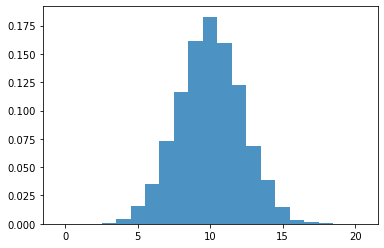

In [13]:
n0 = 20

def experimento():
    'Devuelve el resultado (aleatorio) de lanzar n0 monedas'
    #random.randint(0,1) es 1 ó 0, cada uno con prob 1/2
    return [uno_o_cero(0.5) for j in range(n0)]

def T(w):
    return sum(w)

N = 10000
muestra = [experimento() for i in range(N)]
muestraT = [T(w) for w in muestra]
plt.hist(muestraT, bins=[k+0.5 for k in range(-1,n0+1)], density=1,alpha=0.8)

plt.show()

## Esperanza de una variable aleatoria discreta

Intuitivamente, la **esperanza** o **valor esperado** de una distribución de probabilidad es el **promedio** de los valores obtenidos al hacer muchas extracciones.

Si hacemos una extracción $\{x_i\}_{i=1}^N$ de tamaño N, y el valor k aparece $N_k$ veces, el promedio de los valores obtenidos es:
$$
\frac{1}{N}\Sigma_{i=1}^N \:x_i = \frac{1}{N}\Sigma_{k\in F}\: k\:N_k = \Sigma_{k\in F}\: k\frac{N_k}{N}
$$
Si $N$ es lo bastante grande, cada valor k del soporte de X aparece una proporción $p(k)$, luego $\frac{N_k}{N}\approx p(k)$:

$$
\frac{1}{N}\Sigma_{i=1}^N x_i = \Sigma_{k\in F} k\:\frac{N_k}{N} \approx \Sigma_{k\in F} k\:p(k)
$$

De forma precisa, para una VA discreta y finita son soporte $F$, **la esperanza se define como**:
$$
E(X) = \Sigma_{k\in F} k\:p(k)
$$

Una vez hemos definido una VA, construir su esperanza es aún más fácil que calcular probabilidades:

In [14]:
def promedio_muestra(va, experimento, N=1000):
    muestra = [experimento() for _ in range(N)]
    return sum(va(w0) for w0 in muestra )/N

#### Pregunta
¿Es razonable este valor para la variable X construida antes?

Recordamos que X = "suma de dos lanzamientos independientes de dados de 6 caras"


In [15]:
def experimento():
    'Devuelve el resultado (aleatorio) de lanzar dos dados'
    return [random.randint(1,6), random.randint(1,6)]

def X(w):
    a,b = w
    return a+b

In [16]:
w0 = experimento()
x0 = X(w0)
print(w0, x0)

[5, 6] 11


In [17]:
N = 10000
muestra = [experimento() for _ in range(N)]
sum(X(w0) for w0 in muestra)/N

7.0377

## Transformación de una variable aleatoria discreta: g(X)

Si
$$
X:\Omega\rightarrow \mathbb{R}
$$
es una VA con soporte finito F y $g:\mathbb{R}\rightarrow\mathbb{R}$ es una función, podemos definir una *nueva variable aleatoria*
$$
g\circ X = g(X):\Omega\rightarrow \mathbb{R}
$$
como la composición $w\rightarrow(g\circ X)(w) = g(X(w))$.

### *Soporte* de la variable aleatoria g(X)

Es la imagen $g(F)$ por $g$ del conjunto $F$. *Soporte de g(X)* = $\{f(k),\; k\in F\}$.

### Muestra aleatoria de g(X)

Si $\{x_1,\dots,x_N\}$ es una muestra aleatoria de $X$, entonces
$$\{g(x_1),\dots,g(x_N)\}$$
es una muestra aleatoria de g(X).

#### Ejemplo

U es una VA que se distribuye según una UniformeDiscreta(1,100):
 - calcular la probabilidad $P(U^2>1000)$.
 - calcular la probabilidad $P((U-50)^2>1000)$.

Como $g(x)=x^2$ es inyectiva en el soporte de $U$, podemos calcular (usando que $\sqrt{1000}\approx 31.6$)
$$P(U^2>1000) = P(U>\sqrt{1000}) = P(U\geq 32) = (100-32+1)/100=0.69.$$

En el segundo caso, el cálculo es algo más complejo (y os podéis imaginar de que otras formas se puede complicar cuando $g$ no es inyectiva) 
$$
\begin{split}
P((U-50)^2>1000) &= 
P(U<50-\sqrt{1000} \text{ ó } U>50+\sqrt{1000}) \\ &=
1- P(50-\sqrt{1000}\leq U\leq 50+\sqrt{1000}) \\ &=
1-P(19\leq U\leq 81) \\ &=
1 - (81-19+1)/100 = 0.37.
\end{split}
$$

Sin embargo, para calcular probabilidades que involucran a $g(X)$ mediante simulación, no es importante si $g$ es inyectiva o no.

In [18]:
np.random.seed(2)
#Recuerda que scipy.stats.randint trata de forma diferente a random.randint
# el extremo derecho del intervalo
U = st.randint(1,101)
N = 100000
muestra = U.rvs(N)
P1 = sum(1 for x in muestra if x**2>1000)/N
P2 = sum(1 for x in muestra if (x-50)**2>1000)/N
print('P( U^2 > 1000 ) ~ ', P1)
print('P( (U-50)^2 > 1000 ) ~ ', P2)

P( U^2 > 1000 ) ~  0.69105
P( (U-50)^2 > 1000 ) ~  0.36999


### Esperanza de g(X)

Si no conocemos la expresión de la función de masa pero podemos simular $X$, podemos aproximar la esperanza de $g(X)$ usando una muestra aleatoria independiente:

$$
E(g(X)) \approx \frac{1}{N}\Sigma_{i=1}^N g(x_i)
$$

In [19]:
np.random.seed(1)
U = st.randint(1,101)
N = 10000
muestra = U.rvs(N)
E_U2 = sum(x**2 for x in muestra)/N
print('E[U**2] ~ ', E_U2)

E[U**2] ~  3384.4318


In [20]:
np.random.seed(1)
U = st.randint(1,101)
N = 10000
muestra = U.rvs(N)
muestra_u2 = [x**2 for x in muestra]
E_U2 = sum(x for x in muestra_u2)/N
print('E[U**2] ~ ', E_U2)

E[U**2] ~  3384.4318


### Ejemplo

Comparamos dos variables aleatorias independientes, que tienen la misma media:

 - C, que sigue una distribución binomial con n=20 y p=0.5
 - D, que es la suma de dos variables independientes $D_1, D_2$:
     - $D_1$ sigue una distribución binomial con n=10 y p=0.1
     - $D_2$ sigue una distribución binomial con n=10 y p=0.9

La esperanza de la suma de dos variables aleatorias es la suma de las esperanzas y que la media de una variable aleatoria que sigue una distribución Binomial(n,p) es np, luego:
$$
E[D] = E[D_1 +D_2] = E[D_1] + E[D_2] = 10\cdot 0.1 + 10\cdot 0.9 = 10
$$

In [21]:
Bin1 = st.binom(n=20, p=0.5)
Bin2 = st.binom(n=10, p=0.1)
Bin3 = st.binom(n=10, p=0.9)
#Bin1.mean() 
print(Bin1.mean(), Bin2.mean(), Bin3.mean())

10.0 1.0 9.0


In [22]:
#No necesitamos explicitar el espacio de probabilidad
def C():
    return Bin1.rvs()

def D():
    return Bin2.rvs() + Bin3.rvs()

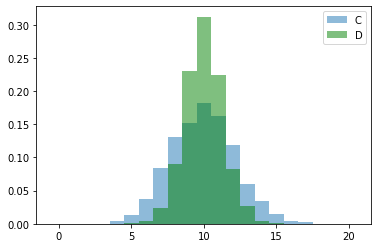

In [23]:
n0 = 20
N = 2000
muestraC = [C() for i in range(N)]
muestraD = [D() for i in range(N)]

plt.hist(muestraC, bins=[k+0.5 for k in range(-1,n0+1)], 
         density=1,alpha=0.5, label='C')
plt.hist(muestraD, bins=[k+0.5 for k in range(-1,n0+1)], 
         density=1,alpha=0.5, color='green', label='D')
plt.legend()
plt.show()

### Varianza y desviación típica

Aproximamos mediante una simulación la desviación típica de las variables C y D:

 - C, que sigue una distribución binomial con n=20 y p=0.5
 - D, que es la suma de dos variables independientes $D_1, D_2$:
     - $D_1$ sigue una distribución binomial con n=10 y p=0.1
     - $D_2$ sigue una distribución binomial con n=10 y p=0.9

In [24]:
N = len(muestraD)
media = sum(muestraD)/N
var = sum((k-media)**2  for k in muestraD)/N
std = np.sqrt(var)
print('E[D]=~',media, ', Var[D]=~',var, ', std[D]=~', std)

E[D]=~ 9.9825 , Var[D]=~ 1.7811937499999946 , std[D]=~ 1.3346137081567815


In [25]:
#La varianza de C es n*p*(1-p)=5, y su desviación estándar es mayor que la de D
print('std[C]=', np.sqrt(5))

std[C]= 2.23606797749979


### Ejercicio

Calcula de forma aproximada, mediante una simulación, la esperanza y la desviación típica de una suma de $N$ variables aleatorias independientes que se distribuyen según una Uniforme([0,1])